In [378]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [383]:
mat = np.load("adj_matrix.npz")['arr_0']
mat1 = np.load("metr_adj_matrix.npz")['arr_0']

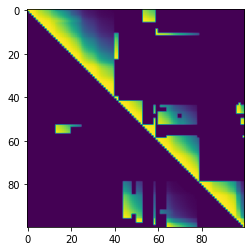

In [385]:
plt.imshow(mat[100:200, 100:200])

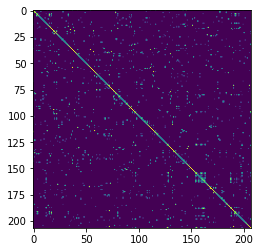

In [381]:
plt.imshow(mat1)

In [44]:
count = []
for e in tqdm(np.nonzero(in_edges == 1)[0]):
    nodes = np.array([e])

    current_len = 0
    
    while len(nodes) != current_len:
        current_len = len(nodes)
        
        neighbours = np.array([], dtype=np.int32)
        for e in nodes:
            neighbours = np.union1d(neighbours, np.nonzero(mat[e])[0])

        nodes = np.union1d(
            nodes,
            np.random.choice(
                neighbours, len(neighbours) // 2, replace=False
            ),
        )
    count.append(current_len)

  0%|          | 0/258 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [45]:
count

[5720,
 5721,
 5720,
 5720,
 5720,
 2,
 5721,
 5719,
 2,
 2,
 5722,
 5720,
 5720,
 5723,
 5720,
 5719,
 5719,
 5741,
 5721,
 5719,
 5729,
 5718,
 5721,
 5721,
 5726,
 5720,
 5718,
 5720,
 5719,
 5722,
 5721,
 5720,
 5720,
 5720,
 5723,
 5744,
 5718,
 5722,
 5718,
 5734,
 5729,
 5716,
 5721,
 5720,
 5720,
 5724,
 5723]

In [37]:
len(nodes), current_len

(1, 1)

In [35]:
count

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [13]:
len(nodes)

5715

In [11]:
mat.shape

(6639, 6639)

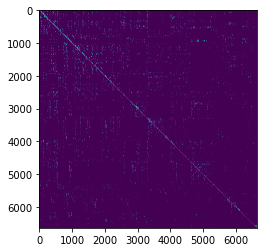

In [9]:
plt.imshow(mat)

In [267]:
np.sum(sampler1.adj[:, 0])

40

In [367]:
class rwt_sampling1:
    def __init__(self, sampler="random"):

        self.adj = (
            np.load(
                "adj_matrix.npz"
            )["arr_0"].astype(np.float32)
            > 0
        )

        self.n_init = 512
        self.n_nodes = 6639
        self.roots = np.nonzero(np.sum(self.adj, axis=0) == 1)[0]

        self.sampler = {
            "custom_train": self.sample,
            "custom_val": self.sample,
        }

    def dummy(self):
        nodes = np.array([np.random.randint(self.n_nodes)])

        while len(nodes) < self.n_init:
            cur_nodes = len(nodes)
            neighbours = np.array([], dtype=np.int32)
            for e in nodes:
                neighbours = np.union1d(neighbours, np.nonzero(self.adj[e])[0])

            chosen_neighbours = (
                neighbours
                if len(neighbours) < 8
                else np.random.choice(neighbours, 8, replace=False)
            )
            nodes = np.union1d(
                nodes,
                chosen_neighbours,
            )

            if cur_nodes == len(nodes):
                remaining_nodes = np.delete(np.arange(6639), nodes)
                print("here")
                return remaining_nodes, nodes
                nodes = np.concatenate(
                    [nodes, np.random.choice(remaining_nodes, 1)]
                )

        return np.array(nodes)[: self.n_init].astype(np.int32)
    
    def sample(self):

        output = tf.numpy_function(self.dummy, [], [tf.int32, tf.int32])
        return output
        positions = tf.ensure_shape(output, [self.n_init])
        support = tf.gather(
                tf.gather(self.adj, positions, axis=1), positions, axis=0
            )

        return support



In [371]:
sampler1 = rwt_sampling1()

In [376]:
adj2 = sampler1.sample()

here


In [370]:
(adj2[0].numpy()  == 3806).any()

False

In [377]:
adj2[1].numpy() 

array([5000])

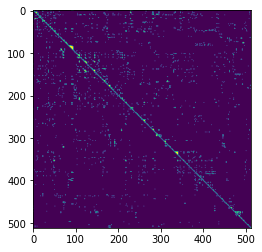

In [342]:
plt.imshow(adj2)

In [331]:
probability_distribution = np.zeros(6639)
probability_distribution1 = np.zeros(6639)

In [332]:
for k in tqdm(range(10)):
    probability_distribution[sampler.sample().numpy()] += 1
    probability_distribution1[sampler1.sample().numpy()] += 1

  0%|          | 0/10 [00:00<?, ?it/s]

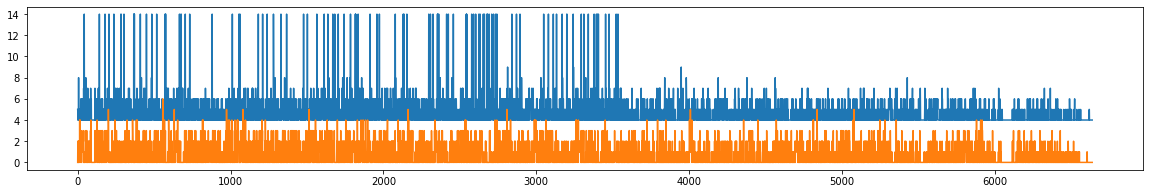

In [334]:
plt.figure(figsize=(20, 3))
plt.plot(probability_distribution + 4)
plt.plot(probability_distribution1)

In [318]:
indices = sampler1.sample().numpy()

1 2
2 120
120 516
516 887
887 1233
1233 1576
1576 1884
1884 2150
2150 2424
2424 2655
2655 2884
2884 3089
3089 3277
3277 3453
3453 3607
3607 3756
3756 3909
3909 4038
4038 4154
4154 4277
4277 4382
4382 4478
4478 4567
4567 4657
4657 4738
4738 4802
4802 4864
4864 4931
4931 4993
4993 5047
5047 5088
5088 5132
5132 5171
5171 5205
5205 5232
5232 5263
5263 5303
5303 5344
5344 5373
5373 5396
5396 5424
5424 5445
5445 5465
5465 5480
5480 5503
5503 5514
5514 5529
5529 5541
5541 5557
5557 5565
5565 5575
5575 5588
5588 5601
5601 5608
5608 5618
5618 5628
5628 5635
5635 5642
5642 5648
5648 5652
5652 5658
5658 5660
5660 5662
5662 5663
5663 5670
5670 5674
5674 5678
5678 5682
5682 5683
5683 5685
5685 5689
5689 5692
5692 5693
5693 5696
5696 5699
5699 5701
5701 5701
5701 5701


InvalidArgumentError: Shape of tensor dummy_input [5701] is not compatible with expected shape [6639]. [Op:EnsureShape]

In [ ]:
indices.shape

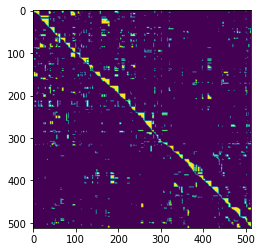

In [203]:
plt.imshow(sampler.adj[sampler.sample().numpy()[:, None],sampler.sample().numpy()])

In [83]:
pos = sampler.sample()

In [89]:
pos[:200]

<tf.Tensor: shape=(200,), dtype=int32, numpy=
array([  3,  11,  14,  17,  19,  22,  26,  28,  30,  32,  38,  40,  41,
        43,  45,  46,  49,  50,  51,  54,  59,  60,  62,  63,  64,  65,
        67,  71,  73,  75,  77,  78,  79,  80,  83,  85,  86,  89,  91,
        95,  98, 101, 104, 105, 109, 110, 111, 116, 117, 118, 121, 123,
       124, 127, 128, 132, 133, 134, 135, 136, 137, 138, 142, 143, 146,
       147, 148, 150, 151, 156, 157, 158, 159, 163, 164, 165, 166, 168,
       179, 181, 184, 187, 188, 189, 190, 194, 196, 201, 202, 203, 205,
       207, 208, 209, 210, 211, 214, 216, 219, 221, 222, 223, 224, 225,
       226, 227, 229, 231, 232, 237, 241, 243, 249, 250, 251, 253, 255,
       256, 259, 277, 283, 284, 287, 290, 291, 292, 293, 294, 295, 297,
       298, 301, 303, 306, 307, 309, 311, 312, 313, 314, 315, 316, 317,
       318, 319, 321, 323, 324, 325, 333, 335, 337, 338, 339, 340, 341,
       344, 346, 349, 351, 359, 362, 365, 367, 369, 371, 373, 374, 375,
       377, 384, 3

In [74]:
adjacency = tf.constant(np.load("./metr_adj_matrix.npz")['arr_0'], dtype=tf.float32)

In [90]:
cur_support = tf.gather(
                tf.gather(adjacency, pos[:200], axis=1), pos[:20], axis=0
)

InvalidArgumentError: indices[91] = 207 is not in [0, 207) [Op:GatherV2]

In [86]:
cur_support

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[1.        , 0.        , 0.        , 0.7409004 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.5873476 , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.41202542,
        1.        , 0.        , 0.        , 0.        , 0.52750796],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.  

In [91]:
stuff = np.arange(100).reshape([10, 10])

In [98]:
np.power(stuff[0].astype(np.float32), -1)

<ipython-input-98-8f89637f2d04>:1: RuntimeWarning: divide by zero encountered in power
  np.power(stuff[0].astype(np.float32), -1)


array([       inf, 1.        , 0.5       , 0.33333334, 0.25      ,
       0.2       , 0.16666667, 0.14285715, 0.125     , 0.11111111],
      dtype=float32)

In [100]:
1/stuff[0]

<ipython-input-100-a48bbd77da39>:1: RuntimeWarning: divide by zero encountered in true_divide
  1/stuff[0]


array([       inf, 1.        , 0.5       , 0.33333333, 0.25      ,
       0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111])

In [72]:
tf.gather(tf.constant(np.arange(100).reshape([10, 10])), tf.constant(100), axis=0)

InvalidArgumentError: indices = 100 is not in [0, 10) [Op:GatherV2]